<a href="https://colab.research.google.com/github/EgorBelugin/ML_Mipt/blob/main/ml_mipt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Библиотеки

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import QuantileTransformer


###1)Начало работы с данными

In [2]:
#scikit-learn.org удалил датасет из этических соображений, поэтому берем из исходного источника. Далее парсим датасет
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :11], raw_df.values[1::2, :3]])

dataset = pd.DataFrame(data, columns=['CRIM', 'ZN',
                             'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
dataset.sample(5, random_state=0)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,23.0
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2


In [3]:
print('Размер выборки составляет l={} объектов.'.format(len(data)))

Размер выборки составляет l=506 объектов.


###Признаки описывающие объекты
    В данной задачи множество объектов описывается n=13 признаками:
    1)CRIM-per capita crime rate by town-уровень преступности на душу населения по городу
    2)ZN-proportion of residential land zoned for lots over 25,000 sq.ft-доля жилых земель, зонированных для участков площадью более 25 000 кв. футов.
    3)INDUS-proportion of non-retail business acres per town-доля площадей под неторговую деятельность на город
    4)CHAS-Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)-Фиктивная переменная Charles River (= 1, если тракт ограничивает реку; 0 в противном случае)
    5)NOX-nitric oxides concentration (parts per 10 million)- концентрация оксидов азота (частей на 10 миллионов)
    6)RM-average number of rooms per dwelling-Среднее количество комнат в жилом помещении
    7)AGE-proportion of owner-occupied units built prior to 1940-доля квартир, занимаемых владельцами, построенных до 1940 г.
    8)DIS-weighted distances to five Boston employment centres-средневзвешенное расстояние до пяти центров занятости Бостона
    9)RAD-index of accessibility to radial highways-индекс доступности центральных автомобильных дорог
    10)TAX-full-value property-tax rate per $10,000-ставка налога на имущество на полную стоимость за 10 000 долларов США
    11)PTRATIO-pupil-teacher ratio by town-соотношение учеников и учителей по городу
    12)B-1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town-где Bk — доля чернокожих по городу.
    13)LSTAT-% lower status of the population-процент населения с более низким статусом

In [15]:
X = dataset.drop(['MEDV'], axis = 1)
print('Размер выборки составляет l={} объектов.'.format(len(X)))
X.sample(5, random_state=0)

Размер выборки составляет l=506 объектов.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


In [5]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

В описании датасета сказано, что все параметры real, positive.

###2)Множество ответов

    MEDV-Median value of owner-occupied homes in $1000's-средняя стоимость домов, занимаемых владельцами, в 1000 долларов США



In [6]:
y = dataset['MEDV']

###3)Задача машинного обучения
- Так как мощность множества \|y|=l=506 ⇒ Получаем задачу регрессии

###4)Визуальный Анализ

1.Используем тепловую карту, чтобы найти корреляцию между признаками.

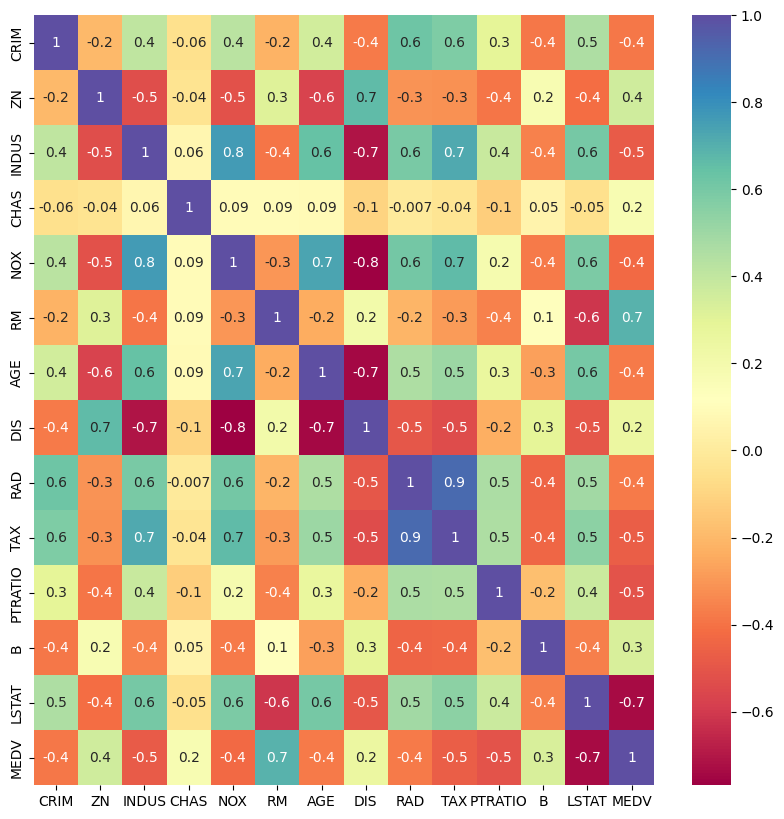

In [7]:


plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, fmt="0.1g", cmap='Spectral')
plt.show()



2.Строим всевомзожные попарные графики

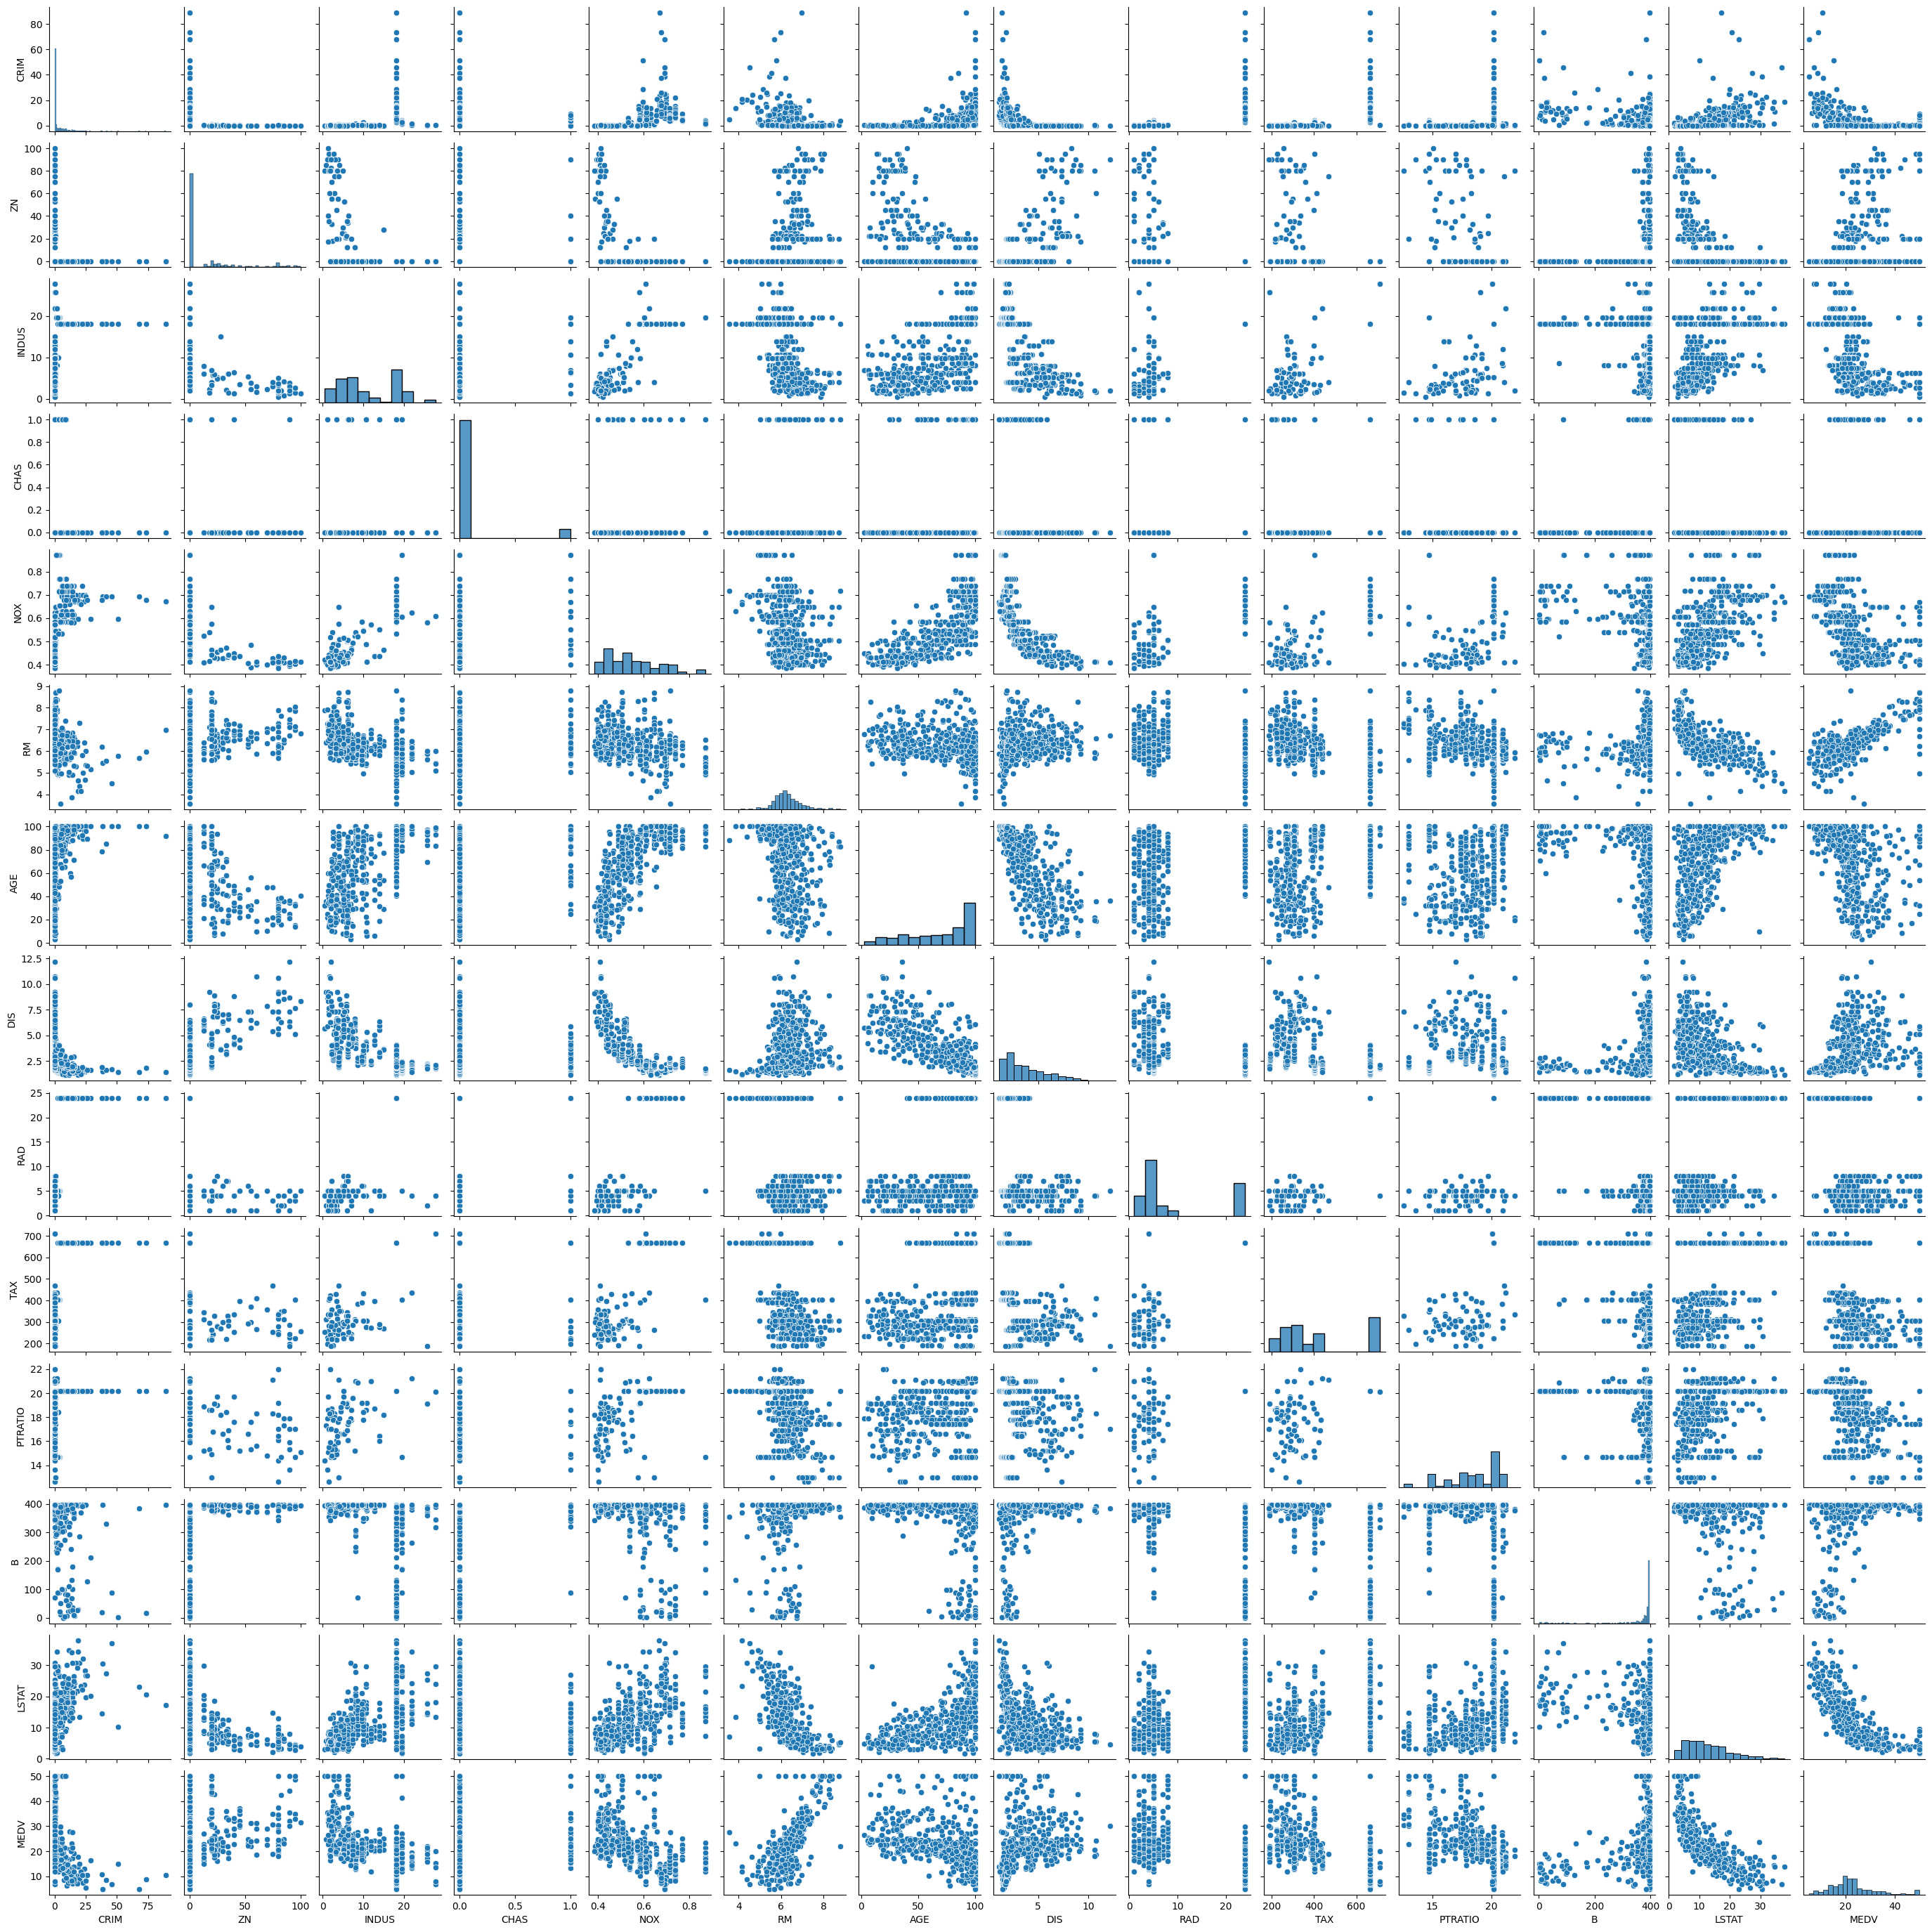

In [8]:
sns.pairplot(dataset, height=2)
plt.show()

Из графиков и таблицы видна высокая корреляция между TAX и RAD, поэтому нужно убрать один из низ.  

In [17]:
X = X.drop(['TAX'], axis = 1)
X.sample(5, random_state=0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,18.7,386.40,12.34


###5)Препроцесинг данных

Все категориальные признаки являются вещественными, поэтому нужно только отнормировать наши данные.

In [18]:
normalizer = preprocessing.MinMaxScaler()
qt = QuantileTransformer(output_distribution='normal')
X_norm_np = normalizer.fit_transform(X)
X_real_norm_np = qt.fit_transform(pd.DataFrame(X_norm_np))
X = pd.DataFrame(data=X_real_norm_np, columns=['CRIM', 'ZN',
                             'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','PTRATIO', 'B', 'LSTAT'])
print(X.head())

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -5.199338  0.701216 -1.480973 -5.199338  0.037236  0.614910 -0.266182   
1 -1.669343 -5.199338 -0.261043 -5.199338 -0.535825  0.373319  0.032269   
2 -1.689680 -5.199338 -0.261043 -5.199338 -0.535825  1.328060 -0.341572   
3 -1.511374 -5.199338 -1.612144 -5.199338 -0.614910  1.141973 -0.642125   
4 -0.772862 -5.199338 -1.612144 -5.199338 -0.614910  1.264807 -0.465485   

        DIS       RAD   PTRATIO         B     LSTAT  
0  0.352114 -5.199338 -1.060078  5.199338 -1.171036  
1  0.617912 -1.535128 -0.468253  5.199338 -0.331067  
2  0.617912 -1.535128 -0.468253  0.141938 -1.511374  
3  0.960838 -1.156382 -0.067059  0.383984 -2.260950  
4  0.960838 -1.156382 -0.067059  5.199338 -1.055735  


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(


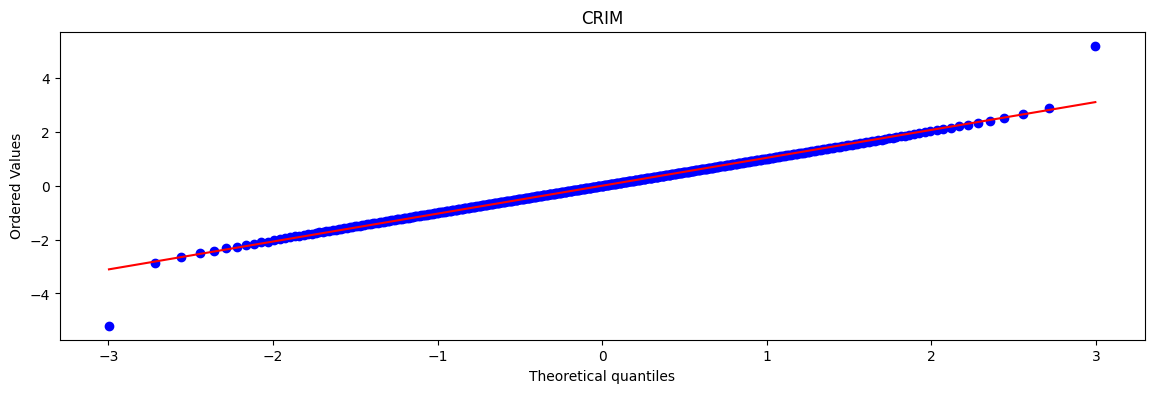

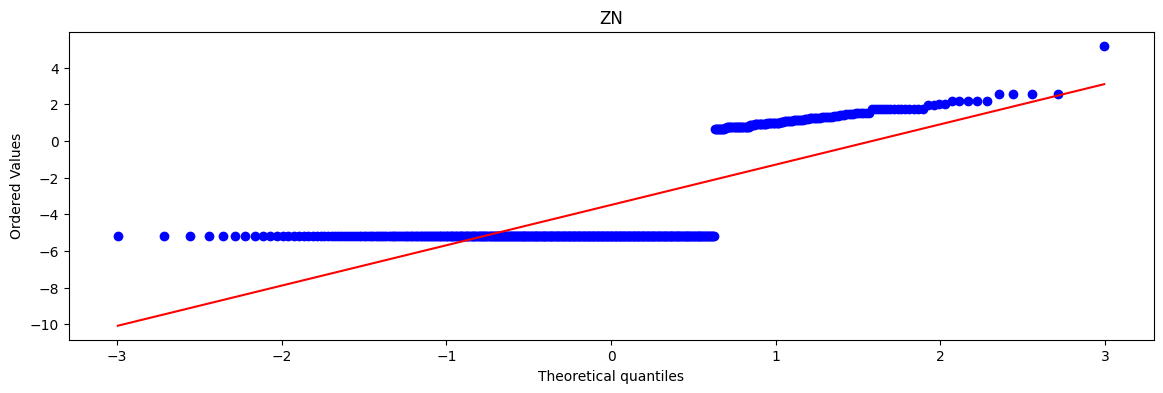

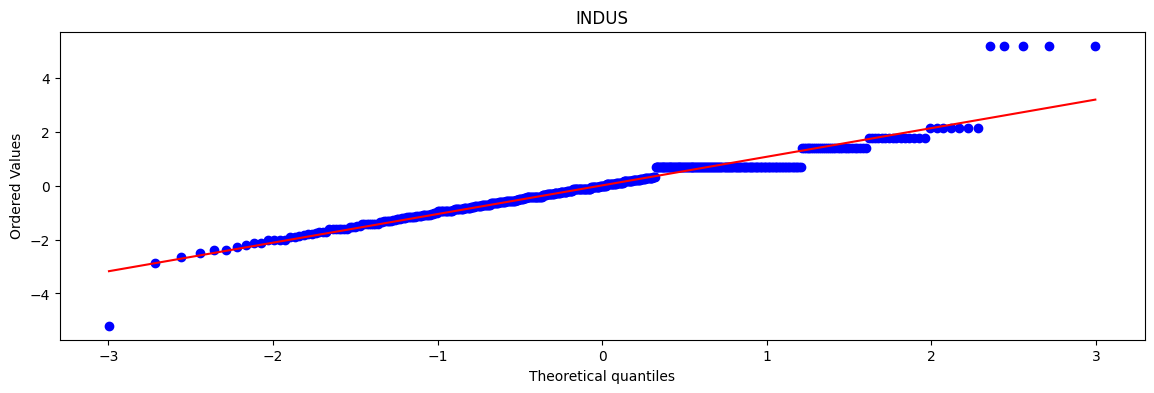

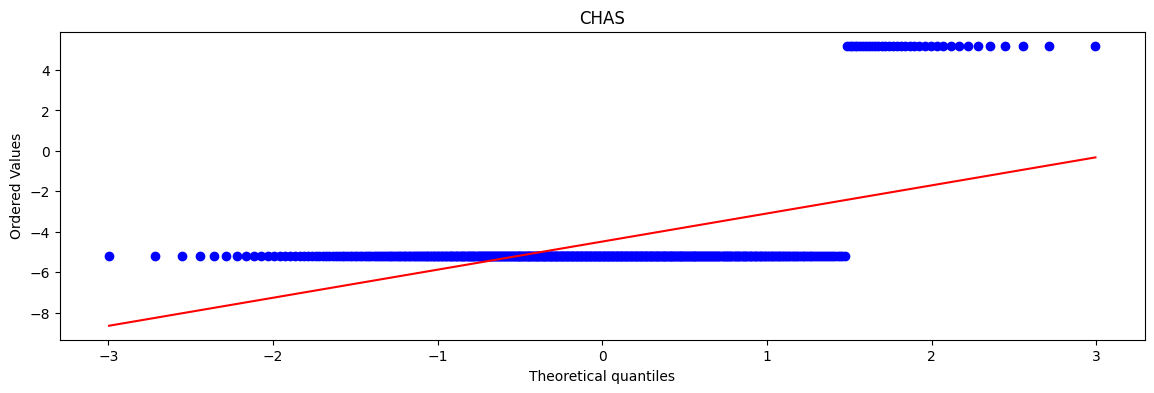

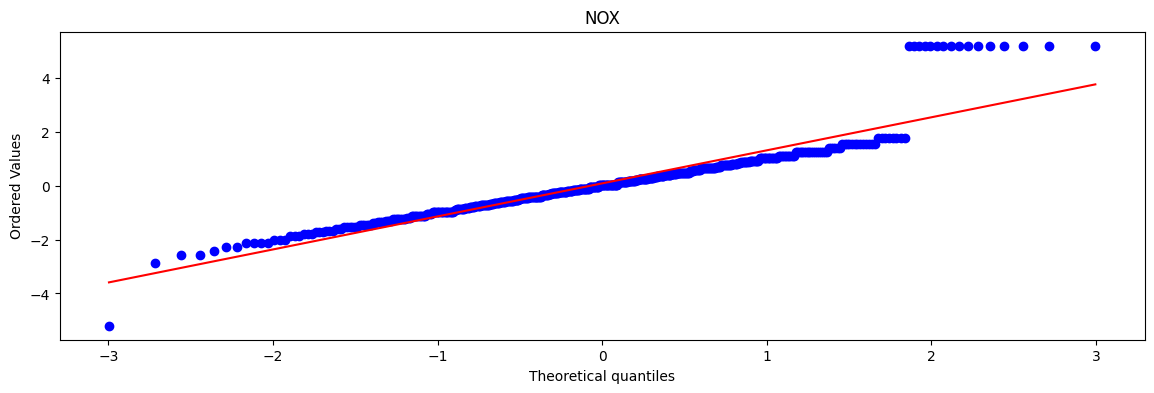

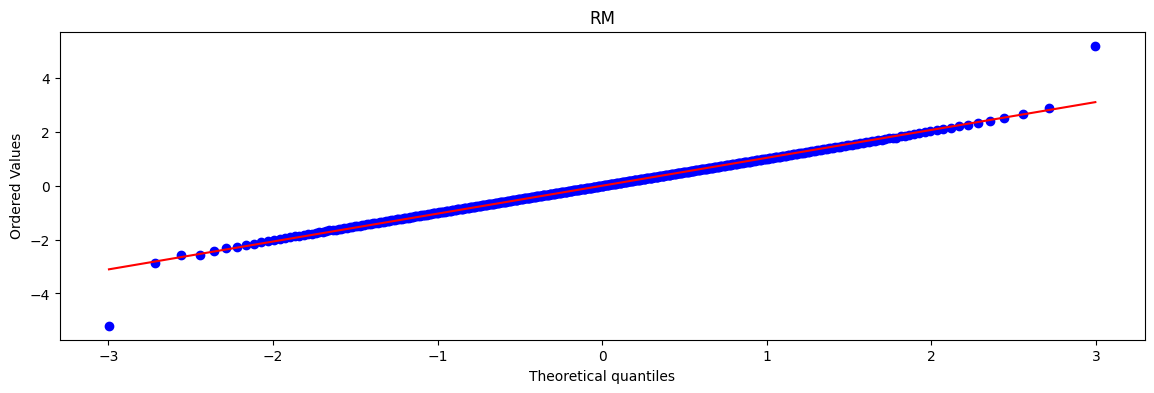

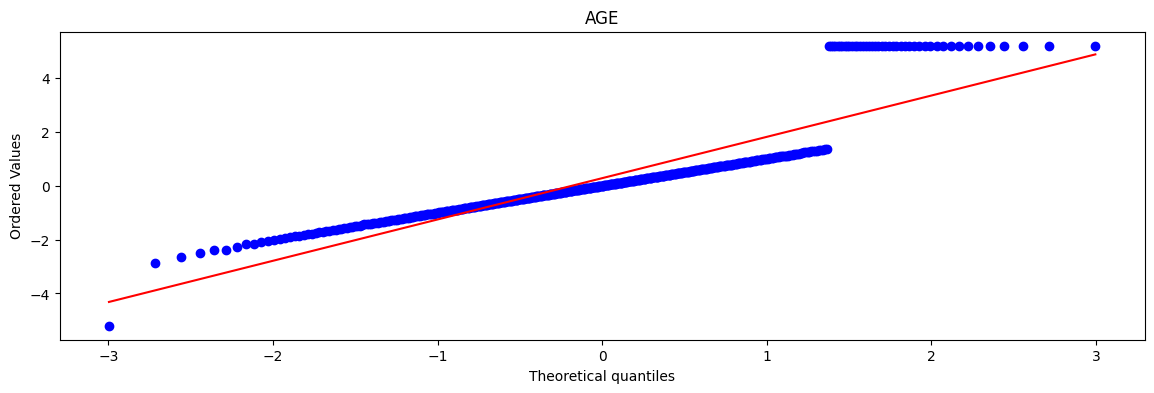

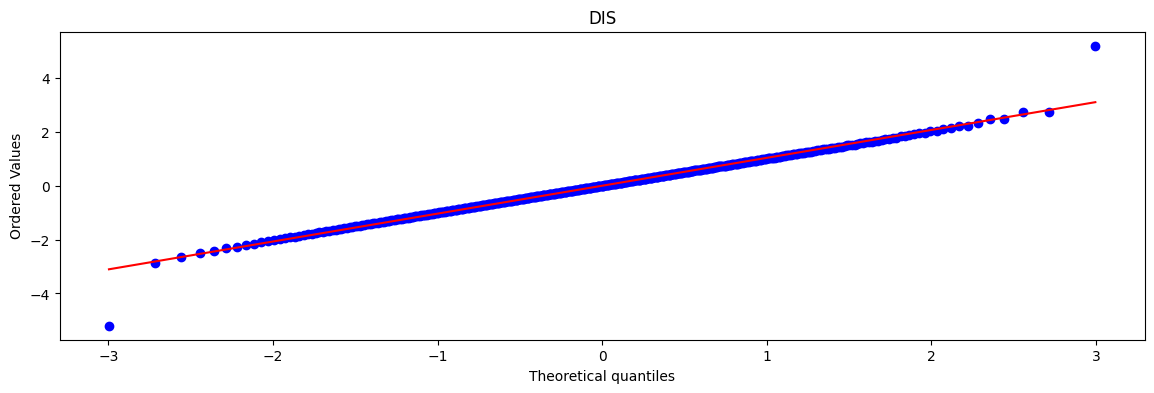

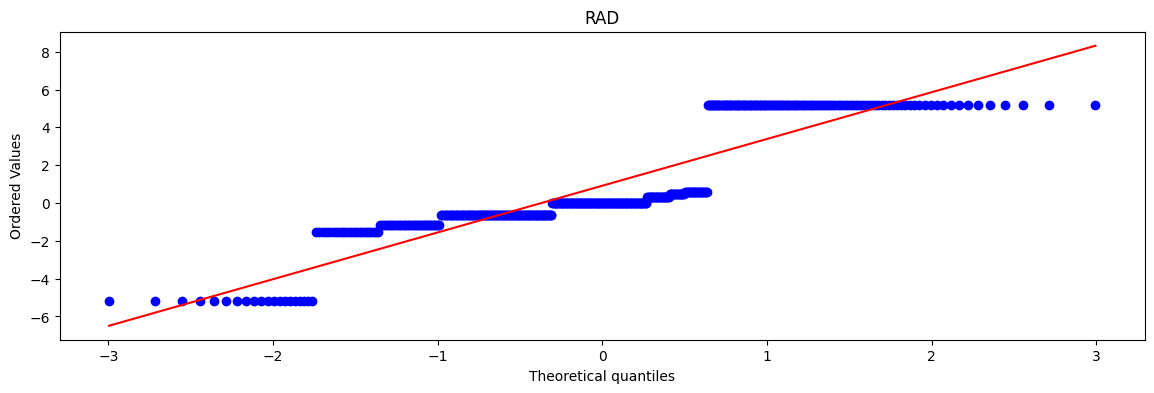

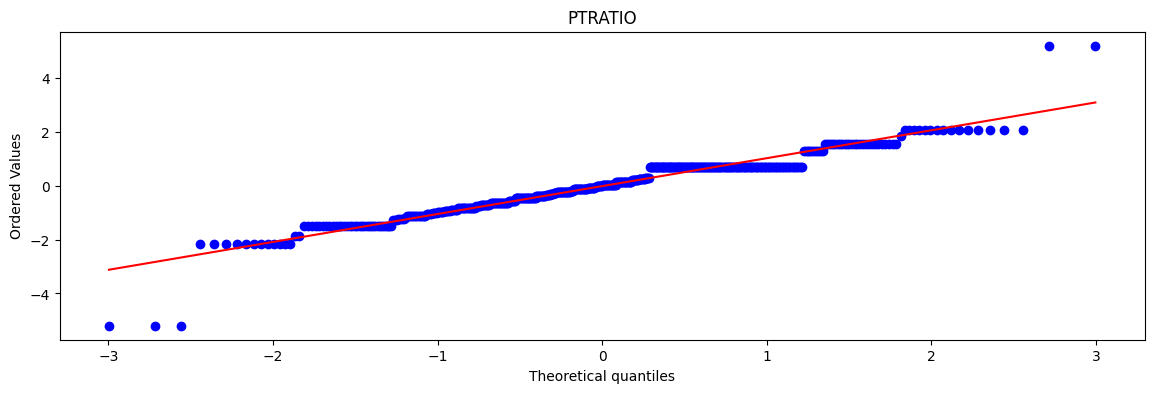

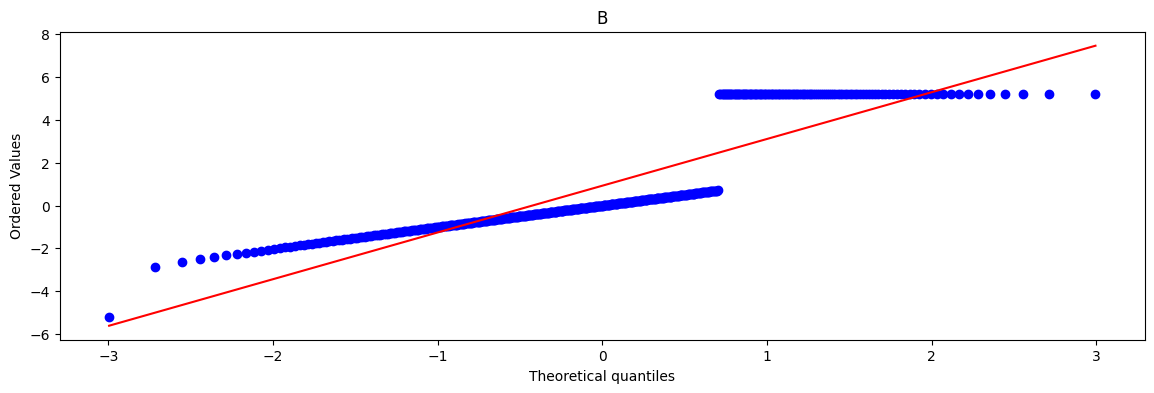

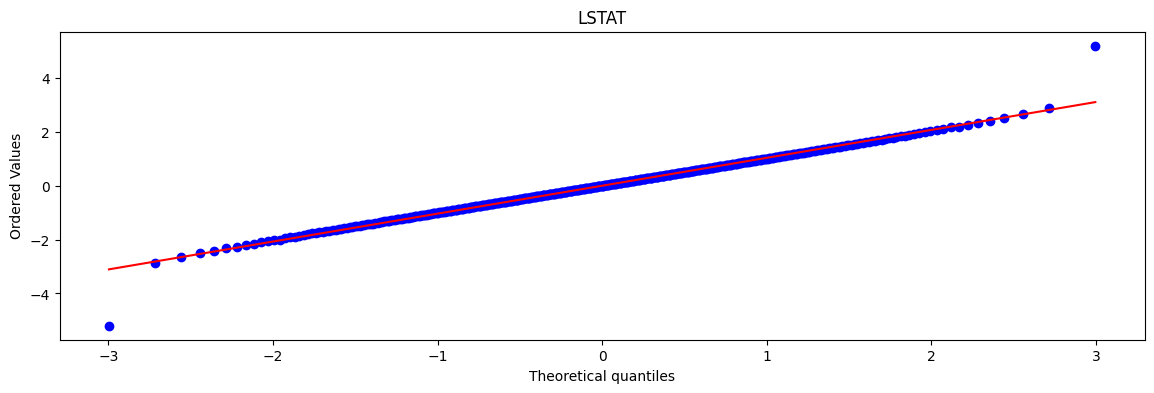

In [29]:
for column in X.columns :
    plt.figure(figsize = (14,4))
    stats.probplot(X[column],dist = 'norm', plot = plt)
    plt.title(column)
    plt.show()


###6)Надарая-Ватсона

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

###7)Линейная регрессия


In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Train MSE: ", mean_squared_error(y_test, y_pred))
print("Train R2: ", r2_score(y_test, y_pred))

Train MSE:  13.850709615812558
Train R2:  0.7781551503914095


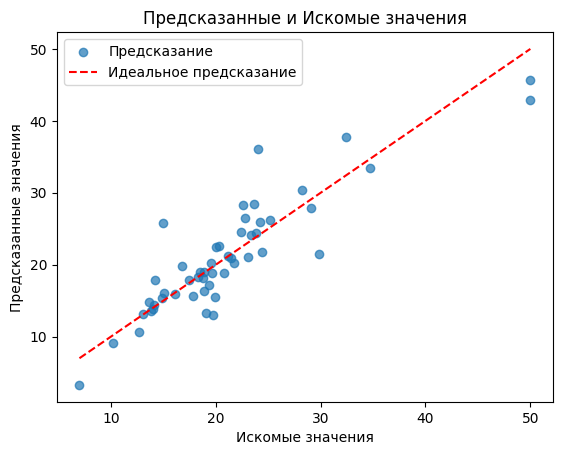

In [21]:
plt.scatter(y_test, y_pred, alpha=0.7, label='Предсказание')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Идеальное предсказание')
plt.xlabel('Искомые значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные и Искомые значения')
plt.legend()
plt.show()

###8)SVR

In [22]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("Train MSE: ", mean_squared_error(y_test, y_pred))
print("Train R2: ", r2_score(y_test, y_pred))

Train MSE:  14.356902574116758
Train R2:  0.7700475296396381


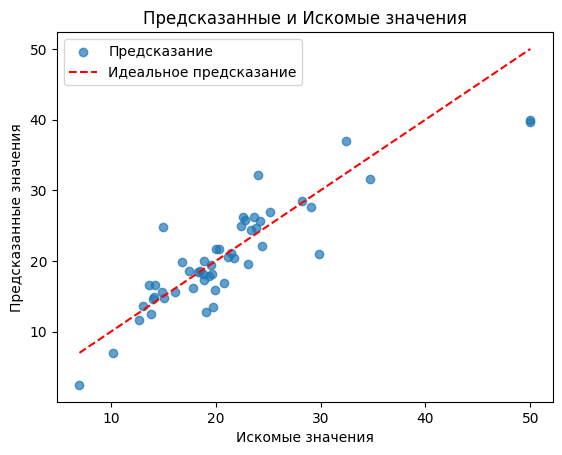

In [23]:
plt.scatter(y_test, y_pred, alpha=0.7, label='Предсказание')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Идеальное предсказание')
plt.xlabel('Искомые значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные и Искомые значения')
plt.legend()
plt.show()